In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt

2023-09-14 20:33:56.153144: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
diabetes_df = pd.read_csv('diabetes_clean_df')
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,binned_age
0,Female,80.0,0,1,never,25.19,6.6,140,0,senior
1,Male,28.0,0,0,never,27.32,5.7,158,0,young_adults
2,Female,36.0,0,0,current,23.45,5.0,155,0,adults
3,Male,76.0,1,1,current,20.14,4.8,155,0,senior
4,Female,20.0,0,0,never,27.32,6.6,85,0,young_adults


In [3]:
# diabetes_df['gender']= diabetes_df['gender'].replace('Male',1)
# diabetes_df['gender']= diabetes_df['gender'].replace('Female',0)
# diabetes_df.head()

In [4]:
diabetes_df= diabetes_df.drop(columns='binned_age')

In [5]:
k_means_df = diabetes_df.copy()

In [6]:
#set targets
y = diabetes_df.diabetes.values
X = diabetes_df.drop(columns="diabetes")



In [7]:
X= pd.get_dummies(X)
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,1,0
1,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1,0
2,36.0,0,0,23.45,5.0,155,1,0,0,1,0,0,0
3,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0
4,20.0,0,0,27.32,6.6,85,1,0,0,0,0,1,0


In [8]:

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [9]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model 1

In [10]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=13))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model= nn_model.fit(X_train_scaled, y_train, epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1505/1505 [==============================] - 3s 1ms/step - loss: 0.1911 - accuracy: 0.9284
Epoch 2/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1414 - accuracy: 0.9485
Epoch 3/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1397 - accuracy: 0.9488
Epoch 4/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1380 - accuracy: 0.9495
Epoch 5/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1356 - accuracy: 0.9501
Epoch 6/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1317 - accuracy: 0.9517
Epoch 7/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1276 - accuracy: 0.9542
Epoch 8/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1232 - accuracy: 0.9559
Epoch 9/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1188 - accuracy: 0.9581
Epoch 10/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.115

In [12]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

502/502 - 1s - loss: 0.1029 - accuracy: 0.9629 - 515ms/epoch - 1ms/step
Loss: 0.10286742448806763, Accuracy: 0.9628567695617676


In [13]:
nn_model.save("diabetes_model1.h5")

/Users/adrienek/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


502/502 [==============================] - 1s 1ms/step


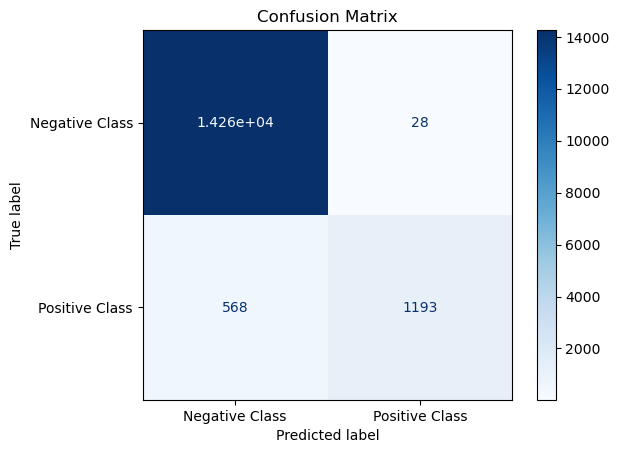

In [14]:
import numpy as np

y_pred = nn_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
# Display the confusion matrix as a heatmap
classes = ["Negative Class", "Positive Class"]  # Replace with your class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title("Confusion Matrix")
plt.show()

# Model 2

In [15]:
# Define the deep learning model
nn_model2 = tf.keras.models.Sequential()
nn_model2.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=13))
nn_model2.add(tf.keras.layers.Dense(units=18, activation="relu"))
nn_model2.add(tf.keras.layers.Dense(units=10, activation="relu"))
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Compile the Sequential model together and customize metrics
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1818 - accuracy: 0.9318
Epoch 2/50
1505/1505 [==============================] - 2s 2ms/step - loss: 0.1405 - accuracy: 0.9492
Epoch 3/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1389 - accuracy: 0.9501
Epoch 4/50
1505/1505 [==============================] - 2s 2ms/step - loss: 0.1367 - accuracy: 0.9504
Epoch 5/50
1505/1505 [==============================] - 2s 2ms/step - loss: 0.1331 - accuracy: 0.9516
Epoch 6/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1287 - accuracy: 0.9525
Epoch 7/50
1505/1505 [==============================] - 2s 1ms/step - loss: 0.1254 - accuracy: 0.9542
Epoch 8/50
1505/1505 [==============================] - 2s 2ms/step - loss: 0.1218 - accuracy: 0.9556
Epoch 9/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1193 - accuracy: 0.9565
Epoch 10/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.116

In [16]:
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

502/502 - 1s - loss: 0.1029 - accuracy: 0.9630 - 540ms/epoch - 1ms/step
Loss: 0.10285071283578873, Accuracy: 0.9629814028739929


In [17]:
nn_model2.save("diabetes_model2.h5")

/Users/adrienek/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model 3


In [18]:
# Define the deep learning model
nn_model3 = tf.keras.models.Sequential()
nn_model3.add(tf.keras.layers.Dense(units=35, activation="relu", input_dim=13))
nn_model3.add(tf.keras.layers.Dense(units=18, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=14, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=13, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=24, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=31, activation="relu"))
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Compile the Sequential model together and customize metrics
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
history = nn_model3.fit(X_train_scaled, y_train, epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1609 - accuracy: 0.9408
Epoch 2/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1328 - accuracy: 0.9521
Epoch 3/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1206 - accuracy: 0.9566
Epoch 4/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1128 - accuracy: 0.9595
Epoch 5/50
1505/1505 [==============================] - 2s 2ms/step - loss: 0.1090 - accuracy: 0.9609
Epoch 6/50
1505/1505 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9604
Epoch 7/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1058 - accuracy: 0.9622
Epoch 8/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1051 - accuracy: 0.9620
Epoch 9/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.1046 - accuracy: 0.9622
Epoch 10/50
1505/1505 [==============================] - 3s 2ms/step - loss: 0.105

In [20]:
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

502/502 - 1s - loss: 0.1027 - accuracy: 0.9633 - 513ms/epoch - 1ms/step
Loss: 0.10271227359771729, Accuracy: 0.9632930159568787


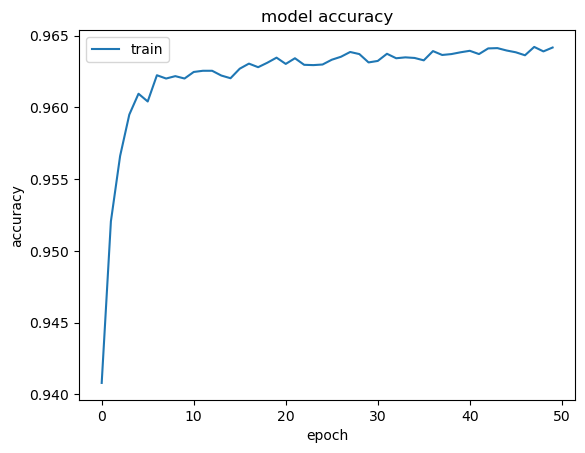

In [22]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
nn_model3.save("diabetes_model3.h5")

